In [84]:
import os
import time
from pathlib import Path
import shutil
import numpy as np
import random
from matplotlib import pyplot as plt
import cv2
from commonfunctions import show_images

In [3]:
N = len(next(os.walk('./data/'))[1])            #N is the number of test cases in data folder (discussion).
M = 100                                         #M is the number of randomly generated test cases 

# Read dataset Metadata

In [172]:
f_dataset = open('./forms.txt', 'r')
Lines = f_dataset.readlines()
writers = []
for i in range(672):
    writers.append(list())

for line in Lines:
    if line[0] != '#':
        writers[int(line.split()[1])].append(line.split()[0])
        
#print(writers)    
f_dataset.close()

# Generate testcases from dataset

In [184]:
tests_writers = []                              #Array to keep the writer of the test image
path = "./test/"
number_of_writers_per_testcase = 3
number_of_images_per_writer = 2
#If folder does not exist create it
if not os.path.exists(path):
    Path(path).mkdir(parents=True, exist_ok=True)

#If folder already exists delete it to generate new test cases
else:
    shutil.rmtree(path)
    Path(path).mkdir(parents=True, exist_ok=True)

#Generate M test cases from the dataset
for i in range(M):
    path = "./test/"
    if i < 9:
        path = path + str(0) + str(i+1)
    else:
        path = path + str(i+1)  
        
    #Create folder for each testcase    
    Path(path).mkdir(parents=True, exist_ok=True)


    #Pick 3 random writers for each test case
    random_writers = []                                                 #Picked writers for a testcase
    while len(random_writers) < number_of_writers_per_testcase:
        W = random.randint(0,len(writers) - 1)                          #Pick random writer
        if not W in random_writers:                                     #Check that writer is not already picked
            if len(writers[W]) > number_of_images_per_writer:           #Check that writer has at least 3 images
                random_writers.append(W)
    
    random_images = []                                                  #All the picked images in the testset
    for j in range(number_of_writers_per_testcase):
        writer_path = path + "/" + str(j + 1)
        Path(writer_path).mkdir(parents=True, exist_ok=True)            #Create folder for each writer
        
        #Pick 2 random images for each writer
        random_images_per_writer = []                                   #Picked images per writer
        while len(random_images_per_writer) < 2:
            I = random.randint(0,len(writers[random_writers[j]]) - 1)              #Pick a random image by the writer
            if not writers[random_writers[j]][I] in random_images_per_writer:      #Check the image is not already picked
                random_images_per_writer.append(writers[random_writers[j]][I])
                random_images.append(writers[random_writers[j]][I])
        
        #Copy the picked images from the dataset folder to testcases
        shutil.copy2("./dataset/" + random_images_per_writer[0] + ".png", writer_path + "/1.png")
        shutil.copy2("./dataset/" + random_images_per_writer[1] + ".png", writer_path + "/2.png")
        
        #shutil.copy2("./data/01/1/1.png", writer_path + "/1.png")
        #shutil.copy2("./data/01/1/1.png", writer_path + "/2.png")
        
        
    #Pick test image from the dataset
    T = random.randint(0, len(random_writers) - 1)                          #Pick the writer of the test image
    while True:
        T_img = random.randint(0, len(writers[random_writers[T]]) - 1)      #Pick the test image
        if not writers[random_writers[T]][T_img] in random_images:          #Check the test image is not in training images
            shutil.copy2("./dataset/" + writers[random_writers[T]][T_img] +".png", path + "/test.png")
            #shutil.copy2("./data/01/test.png", path + "/test.png")
            tests_writers.append(random_writers[T])
            break

print(tests_writers)

[59, 206, 547, 299, 203, 59, 587, 193, 348, 19, 546, 292, 13, 298, 547, 334, 389, 547, 155, 584, 25, 293, 87, 298, 61, 385, 152, 17, 348, 393, 341, 495, 123, 209, 61, 13, 88, 546, 113, 339, 123, 128, 247, 155, 154, 181, 114, 339, 585, 90, 16, 388, 293, 26, 335, 287, 94, 151, 85, 112, 13, 454, 567, 193, 498, 551, 37, 63, 87, 287, 387, 388, 332, 296, 386, 17, 247, 37, 298, 117, 246, 208, 13, 390, 587, 296, 415, 389, 293, 346, 155, 217, 155, 89, 347, 671, 351, 123, 545, 296]


# Program main loop

In [95]:
f_time = open('./output/time.txt', 'w')
f_results = open('./output/results.txt', 'w')

#program main loop
for i in range(N):
    path = "./data/"
    if i < 9:
        path = path + str(0) + str(i+1) + "/"
    else:
        path = path + str(i+1) + "/"
        
    w11 = cv2.imread(path + str(1) + "/1.PNG")
    w12 = cv2.imread(path + str(1) + "/2.png")
    w21 = cv2.imread(path + str(2) + "/1.png")
    w22 = cv2.imread(path + str(2) + "/2.png")
    w31 = cv2.imread(path + str(3) + "/1.png")
    w32 = cv2.imread(path + str(3) + "/2.png")

    test_im = cv2.imread(path + "test.png")

    start_time = time.time()
    #program logic here
      
    end_time = time.time()
    
    f_time.write(str(end_time - start_time) + "\n")
    
f_time.close()
f_results.close()

(array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), [array([[[   0,    0]],

       [[   0, 3407]],

       [[2463, 3407]],

       [[2463,    0]]], dtype=int32), array([[[2287, 2928]],

       [[2288, 2927]],

       [[2295, 2927]],

       [[2296, 2928]],

       [[2298, 2928]],

       [[2299, 2927]],

       [[2305, 2927]],

       [[2306, 2928]],

       [[2308, 2928]],

       [[2309, 2927]],

       [[2315, 2927]],

       [[2317, 2929]],

       [[2317, 2931]],

       [[2316, 2932]],

       [[2315, 2932]],

       [[2314, 2933]],

       [[2313, 2933]],

       [[2312, 2932]],

       [[2308, 2932]],

       [[2307, 2933]],

       [[2232, 2933]],

       [[2231, 2934]],

       [[2229, 2934]],

       [[2228, 2933]],

       [[2220, 2933]],

       [[2219, 2934]],

       [[2091, 2934]],

       [[2090, 2935]]

(array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), [array([[[   0,    0]],

       [[   0, 3407]],

       [[2463, 3407]],

       [[2463,    0]]], dtype=int32), array([[[2287, 2928]],

       [[2288, 2927]],

       [[2295, 2927]],

       [[2296, 2928]],

       [[2298, 2928]],

       [[2299, 2927]],

       [[2305, 2927]],

       [[2306, 2928]],

       [[2308, 2928]],

       [[2309, 2927]],

       [[2315, 2927]],

       [[2317, 2929]],

       [[2317, 2931]],

       [[2316, 2932]],

       [[2315, 2932]],

       [[2314, 2933]],

       [[2313, 2933]],

       [[2312, 2932]],

       [[2308, 2932]],

       [[2307, 2933]],

       [[2232, 2933]],

       [[2231, 2934]],

       [[2229, 2934]],

       [[2228, 2933]],

       [[2220, 2933]],

       [[2219, 2934]],

       [[2091, 2934]],

       [[2090, 2935]]

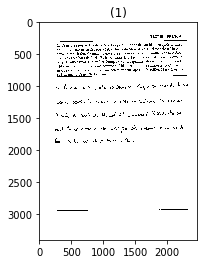

In [96]:
test_im = cv2.imread("./data/01/test.png")
test_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2GRAY)
test_im = cv2.GaussianBlur(test_im,(5,5),0)
test_i,th2 = cv2.threshold(test_im,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

#cv2.drawContours(th2, contours, -1, (0,255,0), 3)


print(contours)

show_images([th2])